<a href="https://colab.research.google.com/github/marzieh135/Masters/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import datetime as dt
import seaborn as sns
import nltk
nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
from nltk.stem import PorterStemmer
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df=pd.read_excel("drive//MyDrive//electronic.xlsx")

In [ ]:
df.shape

(1048566, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048566 entries, 0 to 1048565
Data columns (total 15 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   marketplace        1048566 non-null  object        
 1   customer_id        1048566 non-null  int64         
 2   review_id          1048566 non-null  object        
 3   product_id         1048566 non-null  object        
 4   product_parent     1048566 non-null  int64         
 5   product_title      1048566 non-null  object        
 6   product_category   1048566 non-null  object        
 7   star_rating        1048566 non-null  int64         
 8   helpful_votes      1048566 non-null  int64         
 9   total_votes        1048566 non-null  int64         
 10  vine               1048566 non-null  object        
 11  verified_purchase  1048566 non-null  object        
 12  review_headline    1048559 non-null  object        
 13  review_body        1048511 

In [ ]:
df["reviews"]=df["review_body"]+' '+df["review_headline"]

In [ ]:
df[["year", "day", "month"]] = df["review_date"].astype(str).str.split("-", expand = True)

In [ ]:
df.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,reviews,year,day,month
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,5,0,0,N,Y,excellent,As described.,2015-08-31,As described. excellent,2015,08,31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,5,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31,It works as advertising. It works as advertising.,2015,08,31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,5,1,1,N,Y,excellent,Works pissa,2015-08-31,Works pissa excellent,2015,08,31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,1,0,0,N,Y,One Star,Did not work at all.,2015-08-31,Did not work at all. One Star,2015,08,31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,5,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31,Works well. Bass is somewhat lacking but is pr...,2015,08,31


In [ ]:
df["star_rating"].value_counts()

star_rating
5    644706
4    159707
1    115179
3     74532
2     54442
Name: count, dtype: int64

In [ ]:
def sentiment(lable):
         if lable==5.0 or lable==4.0:
            return "Posetive"
         elif lable==3.0:
            return "Neutral"
         elif lable==2.0 or lable==1.0:
            return "Negative"

In [ ]:
df["star_rating"] = df["star_rating"].apply(sentiment)

In [ ]:
def useful(lable):
         if lable>=1	:
            return "Posetive"
         else:
           return "Negative"

In [ ]:
df.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,reviews,year,day,month
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,Posetive,0,0,N,Y,excellent,As described.,2015-08-31,As described. excellent,2015,08,31
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,Posetive,0,0,N,Y,It works as advertising.,It works as advertising.,2015-08-31,It works as advertising. It works as advertising.,2015,08,31
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,Posetive,1,1,N,Y,excellent,Works pissa,2015-08-31,Works pissa excellent,2015,08,31
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,Negative,0,0,N,Y,One Star,Did not work at all.,2015-08-31,Did not work at all. One Star,2015,08,31
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,Posetive,1,1,N,Y,Overall pleased with the item,Works well. Bass is somewhat lacking but is pr...,2015-08-31,Works well. Bass is somewhat lacking but is pr...,2015,08,31


In [ ]:
category=df.groupby("star_rating").count().customer_id
category

star_rating
Negative    169621
Neutral      74532
Posetive    804413
Name: customer_id, dtype: int64

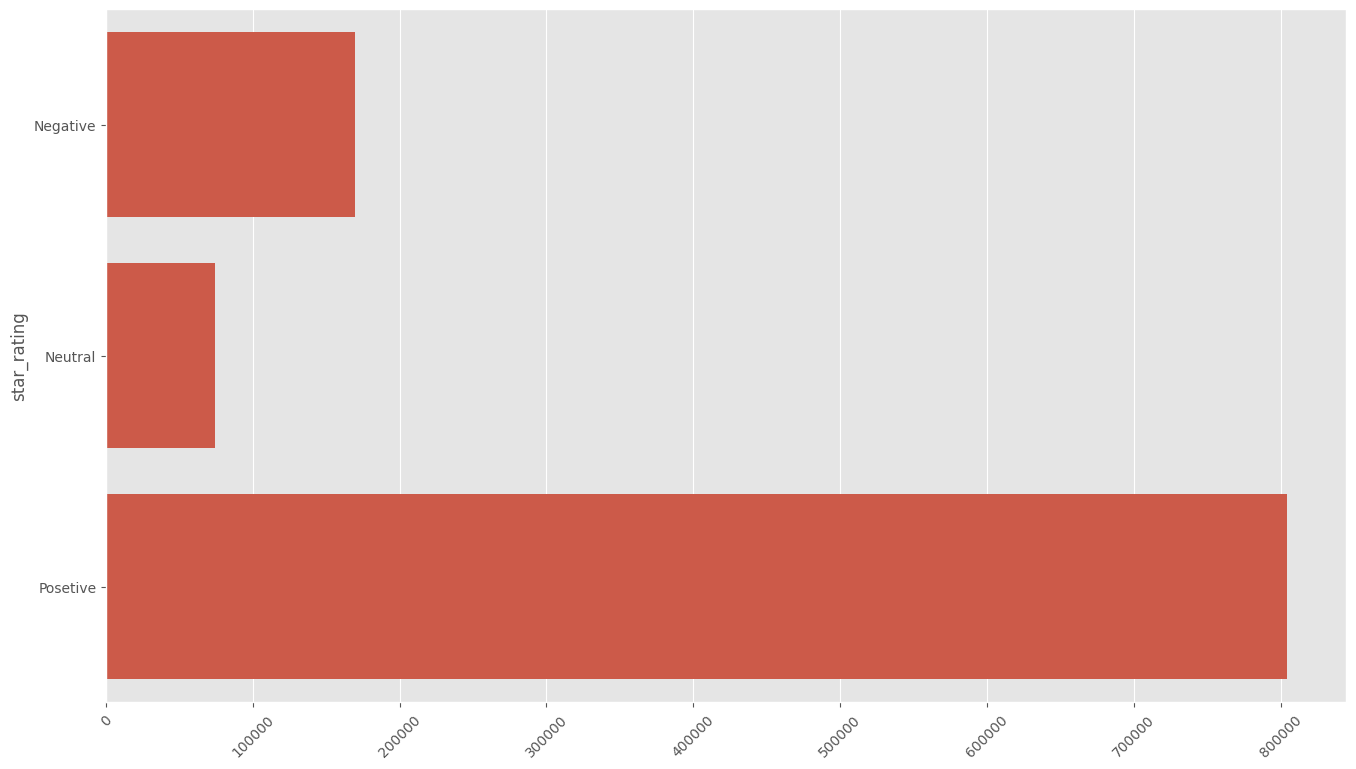

In [ ]:
import seaborn as sns
plt.figure(dpi=100)
sns.barplot(x=category.values,y=category.index, orient='h')
plt.xticks(rotation=45)
plt.yticks()
plt.show()


Text(0.5, 1.0, 'Distribution of sentiments')

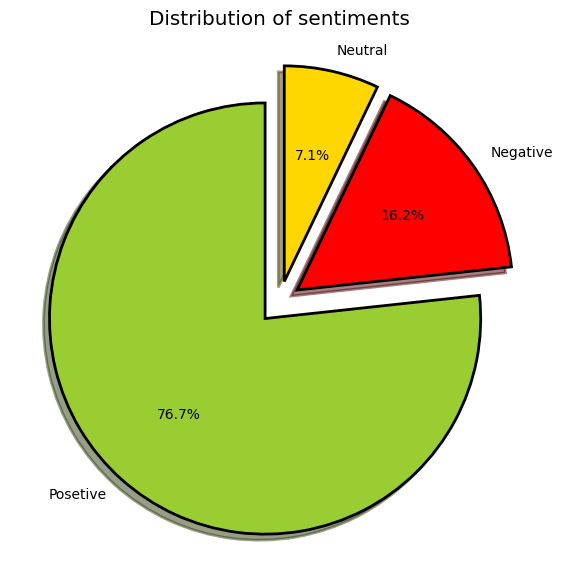

In [ ]:
fig = plt.figure(figsize=(7,7))
colors = ('yellowgreen','red','gold')
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['star_rating'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind = 'pie',autopct='%1.1f%%',shadow=True,colors=colors,
         startangle=90,wedgeprops=wp,explode=explode,label='')
plt.title('Distribution of sentiments')

In [ ]:
pd.DataFrame(df.groupby('star_rating')['helpful_votes'].mean())

,helpful_votes
star_rating,
Negative,1.143809
Neutral,0.792814
Posetive,0.615587


In [ ]:
df['result'] = df['helpful_votes']/df['total_votes']
df['result']=df['result'].round(2)
df['helpful_rate']=df['result']

In [ ]:
df['helpful_rate'].value_counts()

helpful_rate
1.00    140552
0.00     73541
0.50     22138
0.67      9354
0.75      4739
         ...  
0.02        11
0.66         9
0.34         6
0.51         5
0.01         5
Name: count, Length: 101, dtype: int64

In [ ]:
from pylab import rcParams

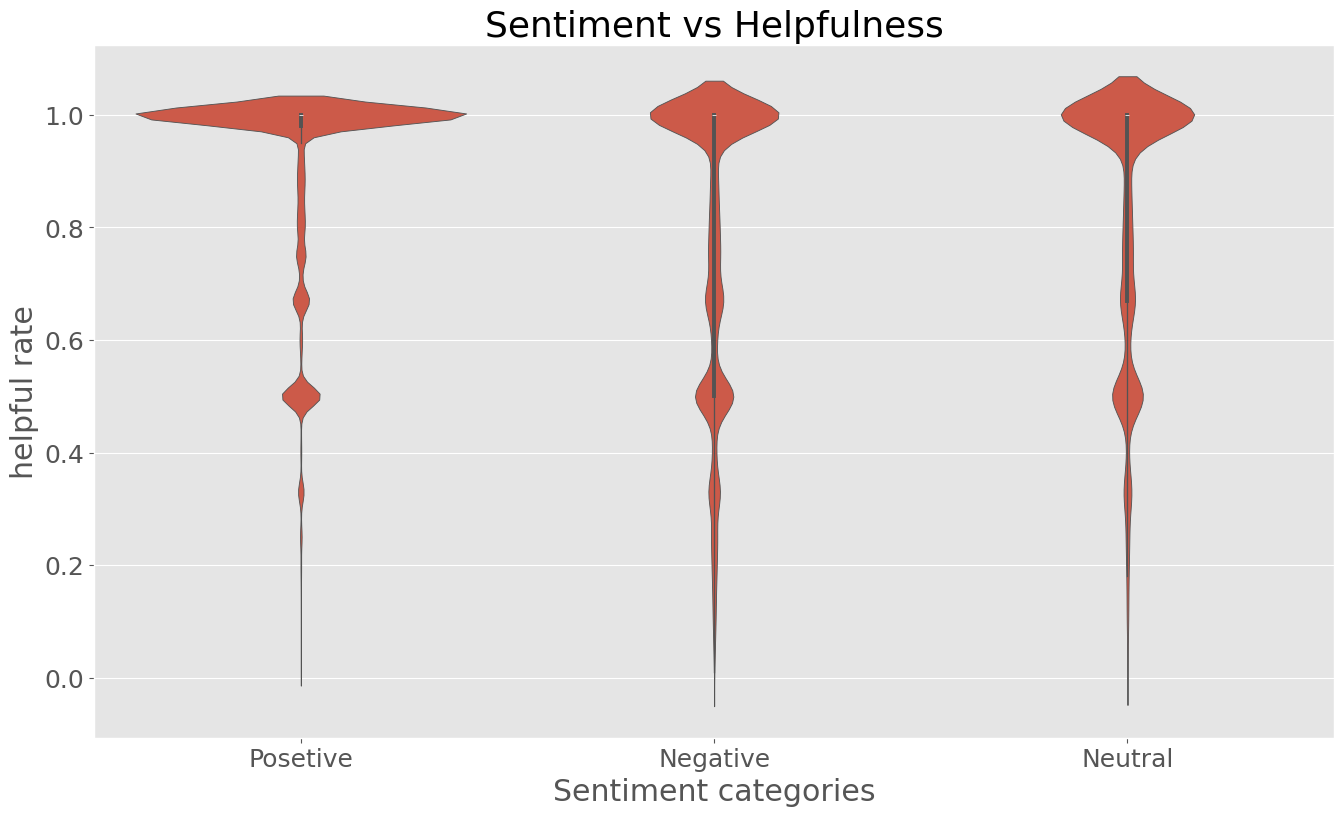

In [ ]:
#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

# Creating dataframe and removing 0 helpfulrate records
senti_help= pd.DataFrame(df, columns = ['star_rating', 'helpful_rate'])
senti_help = senti_help[senti_help['helpful_rate'] != 0.00]

#Plotting phase
sns.violinplot( x=senti_help["star_rating"], y=senti_help["helpful_rate"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment categories')
plt.ylabel('helpful rate')
plt.show()

In [ ]:
df["reviews"] = df["reviews"].astype(str)
def toLower(text):
    return text.lower()

df["reviews"] = df["reviews"].apply(toLower)

In [ ]:
stemmer = PorterStemmer()
def data_preprocessing_stem(text):
    text = re.sub(r"https\S+|www\S+https\S+","",text,flags = re.MULTILINE)
    text = re.sub(r"\@w+|\#","",text)
    text = re.sub(r'[^\w\s]','',text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    stem_words = [stemmer.stem(w) for w in filtered_text]
    return " ".join(stem_words)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df.reviews = df["reviews"].apply(data_preprocessing_stem)

In [ ]:
df = df.drop_duplicates('reviews')

In [ ]:
df.reviews.head(10)

0                                        describ excel
1                          work advertis work advertis
2                                     work pissa excel
3                                        work one star
4    work well bass somewhat lack present overal pl...
5    qualiti speaker insan good doesnt sound muddi ...
6        wish could give product excel lifesav lifesav
7                                     work great excel
8    great sound compact batteri life seem good hap...
9                                       work well good
Name: reviews, dtype: object

In [ ]:
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
cp=sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [ ]:
df["reviews"]=df["reviews"].astype(str)

<ipython-input-72-2f58cef47c61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reviews"]=df["reviews"].astype(str)


In [ ]:
listsent=[]
for row in df["reviews"]:
   vs=analyzer.polarity_scores(row)
   listsent.append(vs)

In [ ]:
df_sentiment=pd.DataFrame(listsent)
df_sentiment.head()

,neg,neu,pos,compound
0,0.000,0.250,0.750,0.4588
1,0.000,1.000,0.000,0.0000
2,0.000,0.400,0.600,0.4588
3,0.000,1.000,0.000,0.0000
4,0.142,0.709,0.149,0.0240


In [ ]:
df_c=pd.concat([df.reset_index(drop=True), df_sentiment],axis=1)
df_c.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,reviews,year,day,month,result,helpful_rate,neg,neu,pos,compound
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,Posetive,0,0,...,describ excel,2015,08,31,NaN,NaN,0.000,0.250,0.750,0.4588
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,Posetive,0,0,...,work advertis work advertis,2015,08,31,NaN,NaN,0.000,1.000,0.000,0.0000
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,Posetive,1,1,...,work pissa excel,2015,08,31,1.0,1.0,0.000,0.400,0.600,0.4588
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,Negative,0,0,...,work one star,2015,08,31,NaN,NaN,0.000,1.000,0.000,0.0000
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,Posetive,1,1,...,work well bass somewhat lack present overal pl...,2015,08,31,1.0,1.0,0.142,0.709,0.149,0.0240


In [ ]:
pip install cufflinks --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.8 MB/s eta 0:00:00


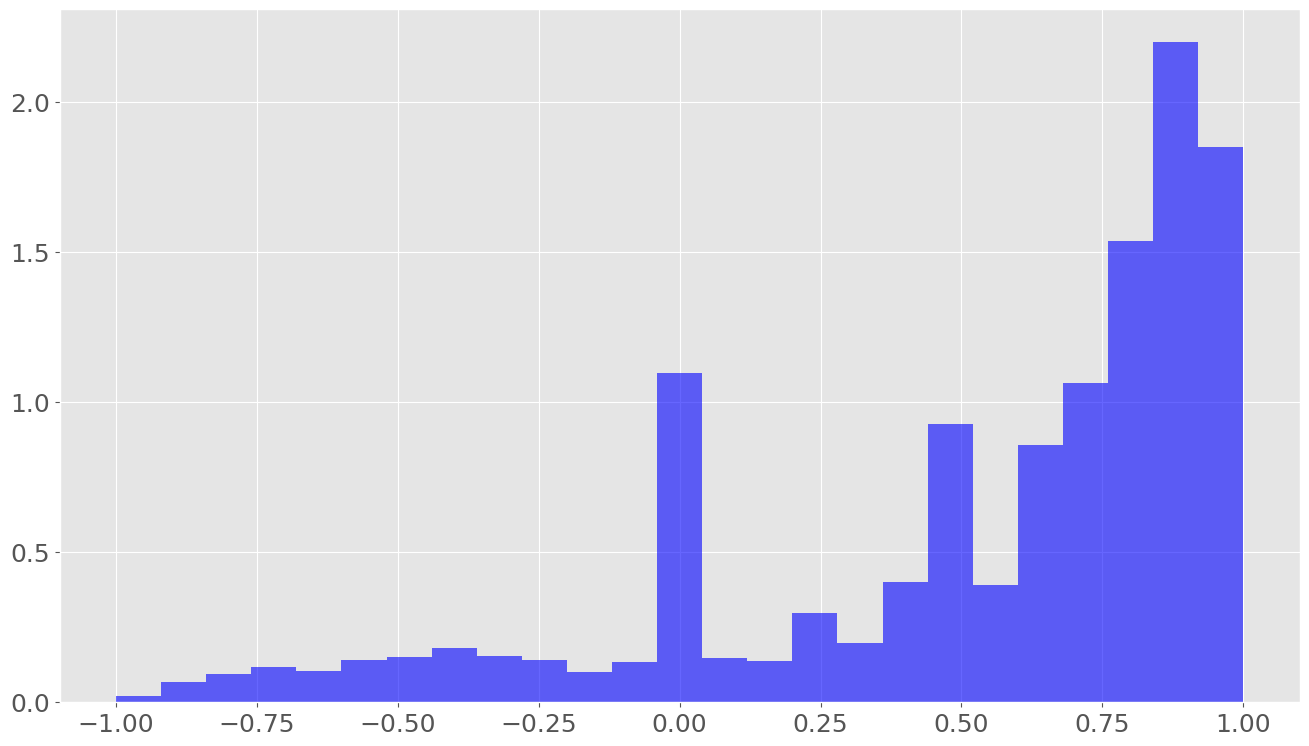

In [ ]:
plt.hist(df_c['compound'], bins=25, density=True, alpha=0.6, color='b')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def get_top_n_words(x,n):
    vec=CountVectorizer(ngram_range=(1,1),stop_words='english')
    bow=vec.fit_transform(x)
    sum_words=bow.sum(axis=0)
    words_freq=[(word,sum_words[0,idx])for word, idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x:x[1], reverse=True)
    return words_freq[:n]

In [ ]:
words=get_top_n_words(df['reviews'],20)

In [ ]:
df_tri=pd.DataFrame(words,columns=['trigram','frequency'])
df_tri

,trigram,frequency
0,work,425461
1,great,413898
2,sound,355197
3,good,288874
4,use,288458
5,excel,189185
6,qualiti,181774
7,speaker,180299
8,br,163109
9,product,162556


In [ ]:
def get_top_n_words(x,n):
    vec=CountVectorizer(ngram_range=(2,2),stop_words='english')
    bow=vec.fit_transform(x)
    sum_words=bow.sum(axis=0)
    words_freq=[(word,sum_words[0,idx])for word, idx in vec.vocabulary_.items()]
    words_freq=sorted(words_freq,key=lambda x:x[1], reverse=True)
    return words_freq[:n]

In [ ]:
words=get_top_n_words(df['reviews'],20)

In [ ]:
df_tri=pd.DataFrame(words,columns=['trigram','frequency'])
df_tri

,trigram,frequency
0,work great,83159
1,sound qualiti,57378
2,great sound,36715
3,great product,28401
4,sound great,28170
5,work fine,24010
6,great price,22948
7,good sound,22339
8,sound good,20064
9,work perfectli,18980


In [ ]:
pos_comments = df_c[df_c.star_rating == 'Posetive']
pos_comments.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,reviews,year,day,month,result,helpful_rate,neg,neu,pos,compound
0,US,41409413,R2MTG1GCZLR2DK,B00428R89M,112201306,yoomall 5M Antenna WIFI RP-SMA Female to Male ...,Electronics,Posetive,0,0,...,describ excel,2015,08,31,NaN,NaN,0.000,0.250,0.750,0.4588
1,US,49668221,R2HBOEM8LE9928,B000068O48,734576678,"Hosa GPM-103 3.5mm TRS to 1/4"" TRS Adaptor",Electronics,Posetive,0,0,...,work advertis work advertis,2015,08,31,NaN,NaN,0.000,1.000,0.000,0.0000
2,US,12338275,R1P4RW1R9FDPEE,B000GGKOG8,614448099,Channel Master Titan 2 Antenna Preamplifier,Electronics,Posetive,1,1,...,work pissa excel,2015,08,31,1.0,1.0,0.000,0.400,0.600,0.4588
4,US,23732619,R372S58V6D11AT,B00JOQIO6S,308169188,Skullcandy Air Raid Portable Bluetooth Speaker,Electronics,Posetive,1,1,...,work well bass somewhat lack present overal pl...,2015,08,31,1.0,1.0,0.142,0.709,0.149,0.0240
5,US,21257820,R1A4514XOYI1PD,B008NCD2LG,976385982,Pioneer SP-BS22-LR Andrew Jones Designed Books...,Electronics,Posetive,1,1,...,qualiti speaker insan good doesnt sound muddi ...,2015,08,31,1.0,1.0,0.000,0.604,0.396,0.7096


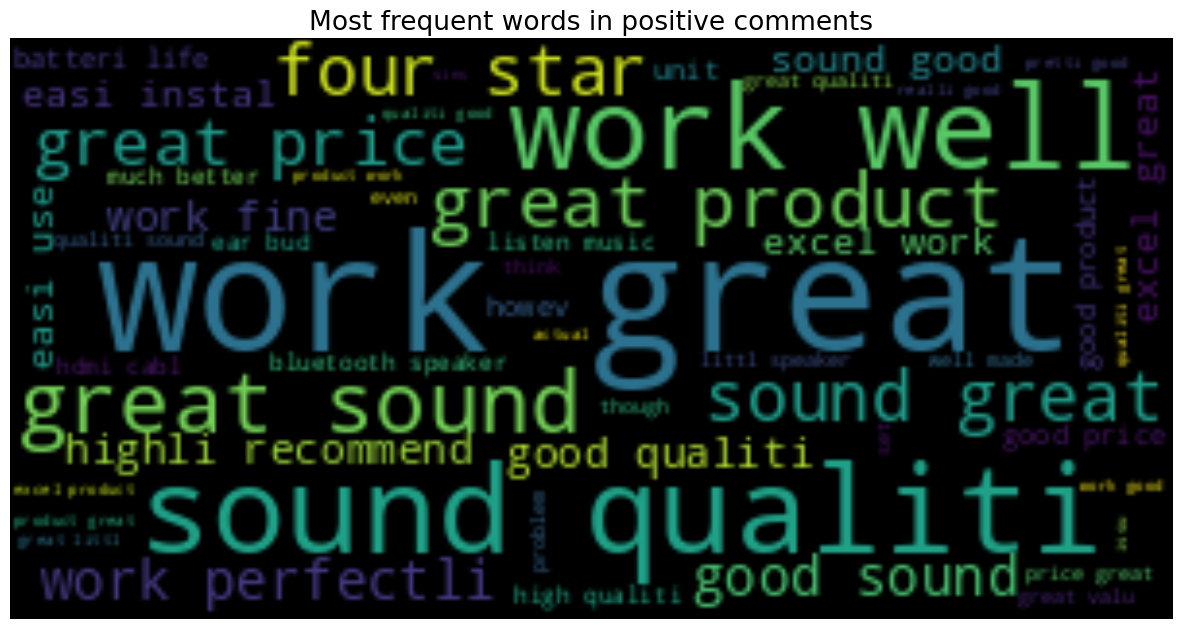

In [ ]:
text = ' '.join(map(str,[word for word in pos_comments['reviews']]))
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=100, width=300, height=150 ).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive comments', fontsize=19)
plt.show()

In [ ]:
ne_comments = df_c[df_c.star_rating == 'Negative']
ne_comments.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,reviews,year,day,month,result,helpful_rate,neg,neu,pos,compound
3,US,38487968,R1EBPM82ENI67M,B000NU4OTA,72265257,LIMTECH Wall charger + USB Hotsync & Charging ...,Electronics,Negative,0,0,...,work one star,2015,08,31,NaN,NaN,0.000,1.000,0.000,0.0000
12,US,31463514,R3T9GZS2TMXZGM,B0035PBHX6,249533961,Coby 8 GB 1.8-Inch Video MP3 Player with FM Radio,Electronics,Negative,0,0,...,break easili take load music one star,2015,08,31,NaN,NaN,0.000,1.000,0.000,0.0000
18,US,47386264,R1WI5NISM6GAUG,B0045EJY90,892920832,TEAC CD-P650-B Compact Disc Player with USB an...,Electronics,Negative,4,5,...,copi cdr usb advertis cd record soni machin pr...,2015,08,31,0.8,0.8,0.064,0.821,0.114,0.1818
19,US,13000908,R27F4OF4BIA4LU,B003BT6BM8,631236454,Philips SHS8100/28 Earhook Headphones,Electronics,Negative,1,1,...,last long stop work within year last long stop...,2015,08,31,1.0,1.0,0.306,0.694,0.000,-0.5267
38,US,47537250,R20TC495KA8WVA,B00990Z4W6,57455227,Crosley CR8005D-BK Cruiser Deluxe Portable 3-S...,Electronics,Negative,1,1,...,bought daughter birthday juli turn 13 play 3 t...,2015,08,31,1.0,1.0,0.065,0.875,0.060,-0.0516


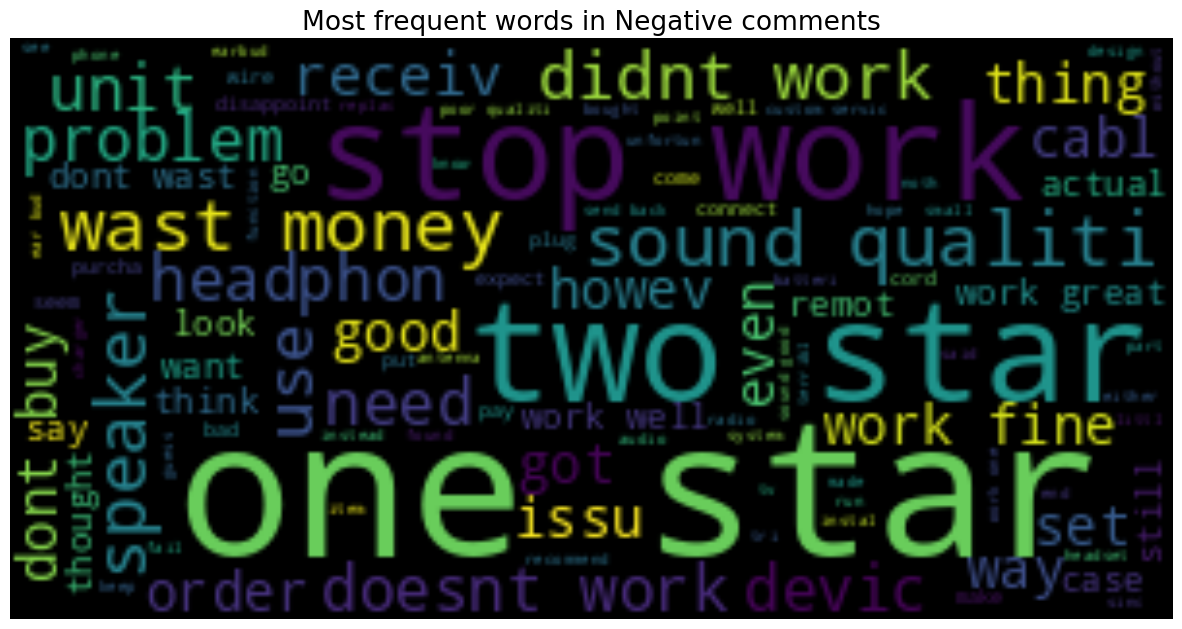

In [ ]:
text = ' '.join(map(str,[word for word in ne_comments['reviews']]))
plt.figure(figsize = (15,15), facecolor='None')
wordcloud = WordCloud(max_words=100, width=300, height=150).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in Negative comments', fontsize=19)
plt.show()

In [ ]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df_c['reviews'])

In [ ]:
feature_names = vect.get_feature_names_out()
print('Number of features: {}\n'.format(len(feature_names)))
print('First 20 features: \n{}'.format(feature_names[:20]))

Number of features: 4336691

First 20 features: 
['00' '00 01' '00 100' '00 800' '00 alarm' '00 amaz' '00 antenna' '00 bad'
 '00 batteri' '00 best' '00 better' '00 bid' '00 bluethooth' '00 boom'
 '00 box' '00 buck' '00 bulki' '00 button' '00 catchal' '00 cd']


In [ ]:
X = df_c['reviews']
Y = df_c['star_rating']
X = vect.transform(X)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [ ]:
print('Size of x_train:',(x_train.shape))
print('Size of y_train:',(y_train.shape))
print('Size of x_test:',(x_test.shape))
print('Size of y_test:',(y_test.shape))

Size of x_train: (697546, 4336691)
Size of y_train: (697546,)
Size of x_test: (174387, 4336691)
Size of y_test: (174387,)


In [ ]:
logreg = LogisticRegression() #solver='lbfgs', max_iter=100
logreg.fit(x_train,y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred,y_test)
print('Test accuracy : {:.2f}%'.format(logreg_acc*100))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test accuracy : 90.07%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print('\n')
print(classification_report(y_test, logreg_pred))

[[ 26573   1728   3510]
 [  2994   6159   4871]
 [  2185   2037 124330]]


              precision    recall  f1-score   support

    Negative       0.84      0.84      0.84     31811
     Neutral       0.62      0.44      0.51     14024
    Posetive       0.94      0.97      0.95    128552

    accuracy                           0.90    174387
   macro avg       0.80      0.75      0.77    174387
weighted avg       0.89      0.90      0.90    174387



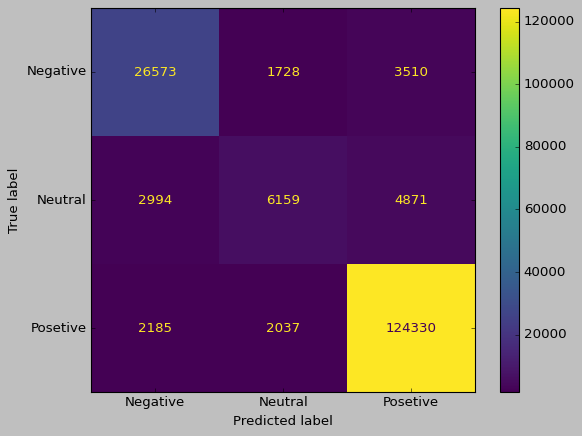

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels = logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred,y_test)
print("test accuracy : {:.2f}%".format(svc_acc*100))

test accuracy : 89.06%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print('\n')
print(classification_report(y_test,svc_pred))

[[ 26087   1953   3771]
 [  3020   6037   4967]
 [  2585   2779 123188]]


              precision    recall  f1-score   support

    Negative       0.82      0.82      0.82     31811
     Neutral       0.56      0.43      0.49     14024
    Posetive       0.93      0.96      0.95    128552

    accuracy                           0.89    174387
   macro avg       0.77      0.74      0.75    174387
weighted avg       0.88      0.89      0.89    174387



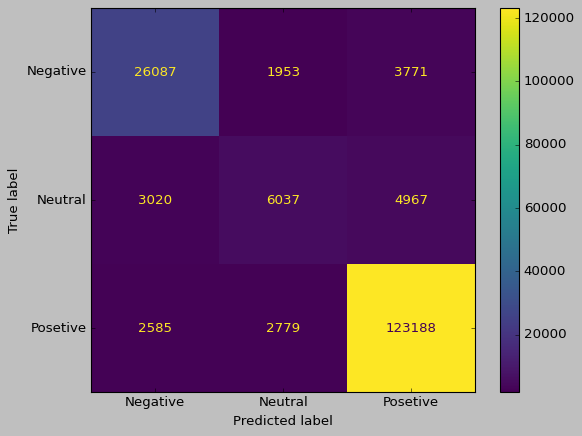

In [ ]:
style.use('classic')
cm = confusion_matrix(y_test, svc_pred, labels = SVCmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVCmodel.classes_)
disp.plot()

In [ ]:
df_c.to_csv("/content/drive/MyDrive/sentiment.csv")